In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from l0bnb import fit_path


## Chapter 6

### Problem 6

We will now explore (6.12) and (6.13) further. 			 	

#### Part (a)

Consider (6.12) with $p = 1$. For some choice of $y_1$ and $λ > 0$, plot (6.12) as a function of $β_1$. Your plot should confirm that (6.12) is solved by (6.14).

($y_1-\beta_1)^2+ \lambda \beta_1^2$
Let $y_1=1$ and $\lambda =2$.

In [4]:
beta=np.linspace(-5,5,100)
z=(1-beta)**2 + 2*beta**2

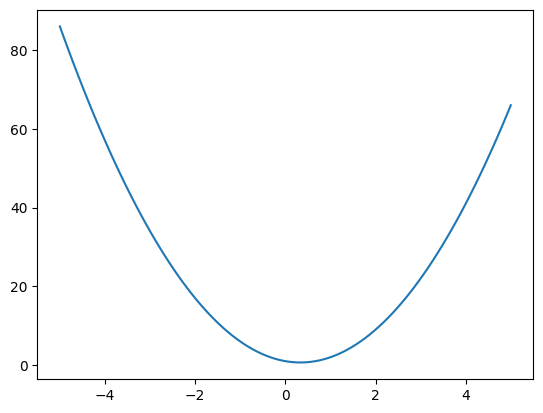

In [5]:
plt.plot(beta,z)

So the minimum is at 1/3, which corresponds to the result from 6.14 as expected.

#### Part (b)

Consider (6.13) with $p = 1$. For some choice of $y_1$ and $λ > 0$, plot (6.13) as a function of $β_1$. Your plot should confirm that (6.13) is solved by (6.15).

Let $y_1=1$ and $\lambda=3$

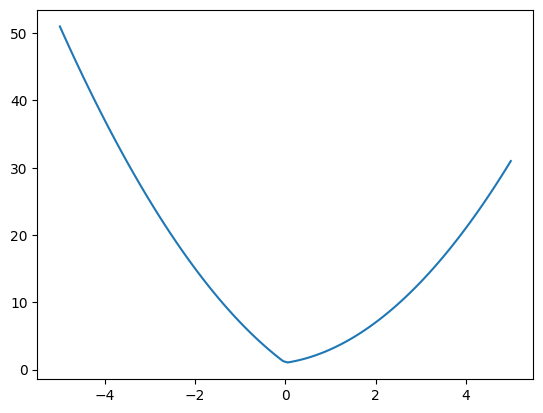

In [6]:
beta=np.linspace(-5,5,100)
z=(1-beta)**2 + 3*np.abs(beta)
plt.plot(beta,z)

The minimum is now at zero as we see in 6.15.

Let's examine all of the piecewise cases in 6.15 for this example.

Here lambda is 1 and $y_1$ is 2.

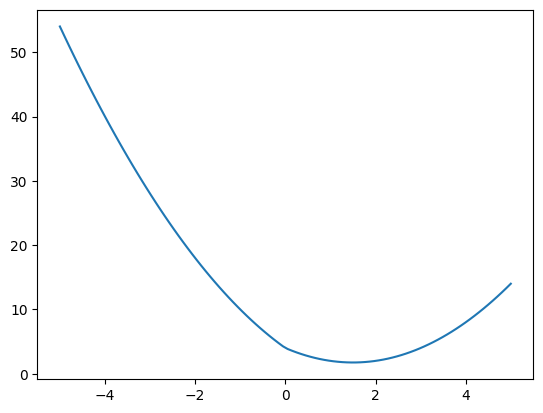

In [7]:
beta=np.linspace(-5,5,100)
z=(2-beta)**2 + 1*np.abs(beta)
plt.plot(beta,z)

### Problem 7

We will now derive the Bayesian connection to the lasso and ridge regression discussed in Section 6.2.2.

#### Part (a)

Suppose that $y_i = β_0 +\sum_{j=1}^p x_{i j} β_j +ε_i$ where $ε_1, \cdots , ε_n$ are independent and identically distributed from a $N(0, σ^2)$ distribution. Write out the likelihood for the data.

### Part (b)

Assume the following prior for $β: β_1, . . . , β_p$ are independent and identically distributed according to a double-exponential distribution with mean 0 and common scale parameter $b$: i.e. $p(β) = 1/(2b)$ exp($−|β|/b)$. Write out the posterior for $β$ in this setting. 

#### Part (c)

Argue that the lasso estimate is the mode for $β$ under this posterior distribution.

#### Part (d)

Now assume the following prior for $β: β_1, . . . , β_p$ are independent and identically distributed according to a normal distribution with mean zero and variance $c$. Write out the posterior for $β$ in this setting.

#### Part (e)

Argue that the ridge regression estimate is both the mode and the mean for $β$ under this posterior distribution.

## Applied Problems

In [8]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split
import pandas as pd

### Problem 8

In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

#### Part (a)

Create a random number generator and use its normal() method to generate a predictor $X$ of length $n = 100$, as well as a noise vector $ε$ of length $n = 100$.

In [9]:
x=np.random.normal(0,1,100)
epsilon=np.random.normal(0,1,100)
x

array([ 1.02174738,  0.06056522,  1.15719775, -0.33819616, -0.36961464,
        1.06724255,  0.05049219,  0.09913377, -1.27688468,  3.08139635,
       -0.2349863 ,  0.08944931, -0.34727904,  0.44457865,  1.22909544,
        1.71179847,  0.74090404,  0.11180076,  0.05489888, -0.75838219,
       -0.43657475,  0.0596273 , -0.39285865, -1.29241896,  0.31165878,
        0.7852645 , -1.65161022,  2.17479195,  0.43307305, -1.82807878,
        0.38588029,  0.92176525, -0.77354616, -0.33024298,  0.03897215,
       -0.20853118,  1.08120485, -1.02713395,  1.08607562, -1.87145288,
       -1.76368244, -0.10304477, -1.22115334, -0.28998871,  0.81952266,
        1.10653271,  0.53136145,  0.52245388,  0.30038867, -1.14634764,
        0.07022451,  0.18960009, -1.39060672,  0.61532185,  1.9661195 ,
        1.3599392 , -0.47337581, -0.38219158,  0.65861979,  0.47216324,
       -1.55578583,  0.36970879,  0.14462524, -0.8928043 ,  0.43413227,
       -0.76755818, -0.77784605, -0.29879667, -0.67259502,  0.25

#### Part (b)

Generate a response vector $Y$ of length $n = 100$ according to the model $$Y =β_0 +β_1X+β_2X^2 +β_3X^3 +ε,$$ where $β_0, β_1, β_2, and β_3$ are constants of your choice.

In [10]:
Y=12 + 25*x + 32* x**2 + 40*x**3 + epsilon
Y

array([ 112.50222701,   13.91571032,  144.16984196,    6.83624193,
          6.76743516,  125.15574671,   13.72484513,   14.96604713,
        -49.9285014 , 1563.09113936,    6.34627241,   14.97422245,
          5.95499672,   34.01095317,  165.65998524,  347.1601131 ,
         64.3006584 ,   15.60470371,   15.14800859,   -5.22503385,
          4.3782778 ,   13.54203294,    3.94553872,  -54.78968814,
         25.25789479,   70.62400687, -123.12503308,  627.59214573,
         32.02909159, -171.09769867,   28.70633537,   89.85453277,
         -5.07850635,    4.80758273,   12.30064154,    8.38381059,
        127.06779898,  -24.85686237,  129.44554275, -185.82109597,
       -152.12988298,    9.76557408,  -44.67440879,    7.8198171 ,
         75.64690406,  131.68305578,   38.84235675,   39.08629768,
         23.6026    ,  -33.68593435,   16.54976206,   18.29474904,
        -69.64252425,   48.73019281,  487.77233407,  205.23482462,
          3.24093828,    4.34804558,   56.09210177,   36.23003

#### Part (c)

Use forward stepwise selection in order to select a model containing the predictors $X, X^2, . . . , X^{10}$. What is the model obtained according to $C_p$? Report the coefficients of the model obtained.

In [11]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n 

In [12]:
X_df = pd.DataFrame({'X': x,'X^2': x**2, 'X^3':x**3,'X^4':x**4,'X^5':x**5,'X^6':x**6,'X^7':x**7,'X^8':x**8,'X^9':x**9,'X^10':x**10})
Y_df = pd.DataFrame({'Y': Y})


In [13]:
from statsmodels.api import OLS

In [14]:
X_df

,X,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10
0,1.021747,1.043968,1.066671,1.089869,1.113570e+00,1.137788e+00,1.162532e+00,1.187814e+00,1.213645e+00,1.240039e+00
1,0.060565,0.003668,0.000222,0.000013,8.149229e-07,4.935598e-08,2.989256e-09,1.810450e-10,1.096503e-11,6.640993e-13
2,1.157198,1.339107,1.549611,1.793207,2.075095e+00,2.401295e+00,2.778773e+00,3.215590e+00,3.721073e+00,4.306018e+00
3,-0.338196,0.114377,-0.038682,0.013082,-4.424288e-03,1.496277e-03,-5.060352e-04,1.711392e-04,-5.787860e-05,1.957432e-05
4,-0.369615,0.136615,-0.050495,0.018664,-6.898359e-03,2.549735e-03,-9.424193e-04,3.483320e-04,-1.287486e-04,4.758736e-05
...,...,...,...,...,...,...,...,...,...,...
95,0.055662,0.003098,0.000172,0.000010,5.343291e-07,2.974203e-08,1.655512e-09,9.214974e-11,5.129274e-12,2.855076e-13
96,-0.911049,0.830010,-0.756179,0.688916,-6.276360e-01,5.718069e-01,-5.209439e-01,4.746052e-01,-4.323884e-01,3.939269e-01
97,0.611139,0.373490,0.228254,0.139495,8.525087e-02,5.210010e-02,3.184039e-02,1.945889e-02,1.189208e-02,7.267710e-03
98,-0.327684,0.107377,-0.035186,0.011530,-3.778123e-03,1.238030e-03,-4.056828e-04,1.329357e-04,-4.356092e-05,1.427421e-05


In [15]:
design = MS(X_df).fit(X_df)
Ynew=np.array(Y_df['Y'])
Xnew = design.transform(X_df)
sigma2 = OLS(Ynew,Xnew).fit().scale

In [16]:
##results1 = sigma2.fit()
##summarize(results1)

See the lab section on forward stepwise selection!

In [17]:
design

ModelSpec(terms=           X       X^2       X^3       X^4           X^5           X^6  \
0   1.021747  1.043968  1.066671  1.089869  1.113570e+00  1.137788e+00   
1   0.060565  0.003668  0.000222  0.000013  8.149229e-07  4.935598e-08   
2   1.157198  1.339107  1.549611  1.793207  2.075095e+00  2.401295e+00   
3  -0.338196  0.114377 -0.038682  0.013082 -4.424288e-03  1.496277e-03   
4  -0.369615  0.136615 -0.050495  0.018664 -6.898359e-03  2.549735e-03   
..       ...       ...       ...       ...           ...           ...   
95  0.05...
3  -5.060352e-04  1.711392e-04 -5.787860e-05  1.957432e-05  
4  -9.424193e-04  3.483320e-04 -1.287486e-04  4.758736e-05  
..           ...           ...           ...           ...  
95  1.655512e-09  9.214974e-11  5.129274e-12  2.855076e-13  
96 -5.209439e-01  4.746052e-01 -4.323884e-01  3.939269e-01  
97  3.184039e-02  1.945889e-02  1.189208e-02  7.267710e-03  
98 -4.056828e-04  1.329357e-04 -4.356092e-05  1.427421e-05  
99 -2.227815e-05  4.822702e-06 -1.044003e-06  2.260024e-07  

[100 rows x 10 columns])

In [18]:
strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))

In [19]:
df_MSE = sklearn_selected(OLS,
                               strategy)
df_MSE.fit(X_df, Ynew)
df_MSE.selected_state_

('X', 'X^10', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9')

In [20]:
neg_Cp = partial(nCp, sigma2)

In [21]:
df_Cp = sklearn_selected(OLS,
                               strategy,
                               scoring=neg_Cp)
df_Cp.fit(Xnew,Ynew)
df_Cp.selected_state_

('X', 'X^2', 'X^3')

The model obtained according to Cp involves x, x^2, x^3

In [22]:
df_Cp.get_params()

{'cv': None,
 'model_args': {},
 'model_type': statsmodels.regression.linear_model.OLS,
 'scoring': functools.partial(<function nCp at 0x3324ee3e0>, 1.1916952793550015),
 'strategy': Strategy(initial_state=(), candidate_states=<bound method Stepwise.candidate_states of <ISLP.models.strategy.Stepwise object at 0x332525100>>, build_submodel=<bound method ModelSpec.build_submodel of ModelSpec(terms=           X       X^2       X^3       X^4           X^5           X^6  \
 0   1.021747  1.043968  1.066671  1.089869  1.113570e+00  1.137788e+00   
 1   0.060565  0.003668  0.000222  0.000013  8.149229e-07  4.935598e-08   
 2   1.157198  1.339107  1.549611  1.793207  2.075095e+00  2.401295e+00   
 3  -0.338196  0.114377 -0.038682  0.013082 -4.424288e-03  1.496277e-03   
 4  -0.369615  0.136615 -0.050495  0.018664 -6.898359e-03  2.549735e-03   
 ..       ...       ...       ...       ...           ...           ...   
 95  0.05...
 3  -5.060352e-04  1.711392e-04 -5.787860e-05  1.957432e-05  
 4

#### Part (d)

Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

In [23]:
strategy2 = Stepwise.first_peak(design,direction='backwards',max_terms=len(design.terms))
neg_Cp1=partial(nCp,sigma2)
Y_CpBack=sklearn_selected(OLS,strategy2,scoring=neg_Cp1)
Y_CpBack.fit(Xnew,Ynew)
Y_CpBack.selected_state_

('X', 'X^2', 'X^3')

In [24]:
#strategy2 = Stepwise(design,
#                        direction='backward', ***** backward vs backwards *****
#                        min_terms=1,
#                        max_terms=len(design.terms))

In [25]:
#df_Cp = sklearn_selected(OLS,
#                               strategy2,
#                               scoring=neg_Cp)
#results1=df_Cp.fit(df, Y)
#df_Cp.selected_state_

#### Part (e)

Now fit a lasso model to the simulated data, again using $X,X^2, . . . , X^{10}$ as predictors. Use cross-validation to select the optimal value of $λ$. Create plots of the cross-validation error as a function of $λ$. Report the resulting coefficient estimates, and discuss the results obtained.

In [26]:
scaler = StandardScaler(with_mean=True,  with_std=True)

In [27]:
K=5
kfold = skm.KFold(K, random_state=0, shuffle=True)

In [28]:
lassoCV = skl.ElasticNetCV(n_alphas=100, l1_ratio=1, cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),('lasso', lassoCV)])
pipeCV.fit(X_df, Y_df)
tuned_lasso = pipeCV.named_steps['lasso'] 
tuned_lasso.alpha_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.19382222148475955

In [29]:
tuned_lasso.coef_

array([ 23.77739121,  43.44680833, 150.54530464,   0.1692863 ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ])

In [30]:
Xs = X_df - X_df.mean(0)[None,:]
X_scale = X_df.std(0)
Xs = Xs / X_scale[None,:]
lambdas = 10**np.linspace(8, -2, 100) / Y.std() 
soln_array = skl.ElasticNet.path(Xs,
                                Y,
                                l1_ratio=1., 
                                alphas=lambdas)[1]
soln_array.shape



/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_7214/1239374391.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = X_df - X_df.mean(0)[None,:]
/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_7214/1239374391.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = Xs / X_scale[None,:]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 735.6197004676214, tolerance: 415.9298371935417
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-p

(10, 100)

In [31]:
design = MS(X_df).fit(X_df)
Ynew=np.array(Y_df['Y'])
Xnew = design.transform(X_df)
sigma2 = OLS(Ynew,Xnew).fit().scale

In [32]:
D=design.fit_transform(X_df)
D=D.drop('intercept',axis=1)

In [33]:
lambdas, soln_array = skl.Lasso.path(Xs, 
                                     Y, 
                                     l1_ratio=1,
                                    n_alphas=100)[:2] 
soln_path = pd.DataFrame(soln_array.T,
                        columns=D.columns, 
                        index=-np.log(lambdas))

In [34]:
np.min(tuned_lasso.mse_path_.mean(1))

1.7129959079717811

Let's create a plot of the cross-validation error.

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_7214/2312041740.py:8: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


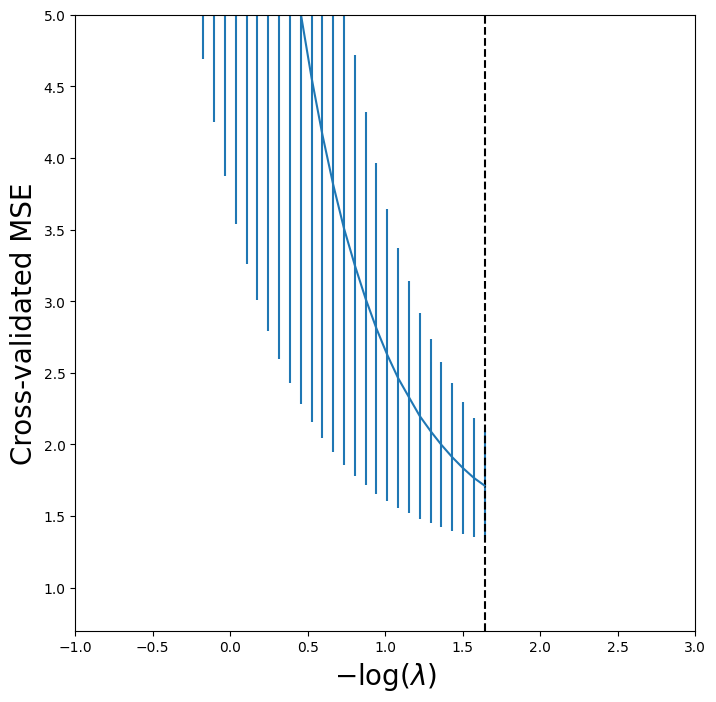

In [35]:
lassoCV_fig, ax = subplots(figsize=(8,8)) 
ax.errorbar(-np.log(tuned_lasso.alphas_),
                    tuned_lasso.mse_path_.mean(1),
                    yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K)) 
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--') 
ax.set_ylim([0.7,5])
ax.set_xlim([-1,3])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20) 
ax.set_ylabel('Cross-validated MSE', fontsize=20);

The coefficients are:

In [36]:
tuned_lasso.coef_

array([ 23.77739121,  43.44680833, 150.54530464,   0.1692863 ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ])

Six coefficients are exactly zero with Lasso.

Discussion Question: Why is the minimum lambda value the same as the best lambda value? And why is there a minimum lambda value here?

#### Part (f)

Now generate a response vector $Y$ according to the model $$Y = β_0 + β_7X^7 + ε,$$ and perform forward stepwise selection and the lasso. Discuss the results obtained.

Forward Stepwise:

In [37]:
Y=10+100*x**7+epsilon
X_df = pd.DataFrame({'X': x,'X^2': x**2, 'X^3':x**3,'X^4':x**4,'X^5':x**5,'X^6':x**6,'X^7':x**7,'X^8':x**8,'X^9':x**9,'X^10':x**10})
Y_df= pd.DataFrame({'Y':Y})

In [38]:
design = MS(X_df).fit(X_df)
Ynew=np.array(Y_df['Y'])
Xnew = design.transform(X_df)
sigma2 = OLS(Ynew,Xnew).fit().scale

In [39]:
strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))

In [40]:
df_Cp = sklearn_selected(OLS,
                               strategy,
                               scoring=neg_Cp)
df_Cp.fit(Xnew,Ynew)
df_Cp.selected_state_

('X^2', 'X^7')

In forward stepwise selection, the best model will have nonzero coefficients for X^4 and X^7.

Lasso:

In [41]:
lassoCV = skl.ElasticNetCV(n_alphas=100, l1_ratio=1, cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),('lasso', lassoCV)])
pipeCV.fit(X_df, Y_df)
tuned_lasso = pipeCV.named_steps['lasso'] 
tuned_lasso.alpha_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


26.470821100540153

In [42]:
tuned_lasso.coef_

array([  -29.0661366 ,     0.        ,     0.        ,     0.        ,
        3504.36008702,   367.98514418, 15192.78351212,   295.33656092,
        6751.92020275,   423.85562789])

Why do these coefficients seem so different than the chosen coefficient? We expected more of a lean toward X^7. Maybe come back to this to see if it's incorrect.

### Problem 9

In this exercise, we will predict the number of applications received using the other variables in the College data set.

In [43]:
college=load_data('college')
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [44]:
np.isnan(college['Apps']).sum()

0

In [45]:
college=college.dropna()

In [46]:
college=college.drop('Private', axis=1)

In [47]:
college

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


#### Part (a)

Split the data set into a training set and a test set.

In [48]:
college_train, college_valid = train_test_split(college,
                                         test_size=100,
                                         random_state=0)

#### Part (b)

Fit a linear model using least squares on the training set, and report the test error obtained.

In [49]:
design = MS(college_train.columns.drop('Apps')).fit(college_train)
Y = np.array(college_train['Apps'])
X = design.transform(college_train)
sigma2 = OLS(Y,X).fit().scale

Needed to drop the first column with strings.

#### Part (c)

Fit a ridge regression model on the training set, with $λ$ chosen by cross-validation. Report the test error obtained.

Associated with each value of $\lambda$ is a vector of ridge regression coefficients,   that can be accessed by a column of `soln_array`. In this case, `soln_array` is a $16 \times 100$ matrix, with
16 rows (one for each predictor) and 100
columns (one for each value of $\lambda$).

We transpose this matrix and turn it into a data frame to facilitate viewing and plotting.

In [50]:
Xs = X - X.mean(0)[None,:]
Xs=Xs.drop('intercept', axis=1)
X_scale = Xs.std(0)
Xs = Xs / X_scale[None,:]
lambdas = 10**np.linspace(8, -2, 100) / Y.std() 
soln_array = skl.ElasticNet.path(Xs,
                                Y,
                                l1_ratio=1., 
                                alphas=lambdas)[1]
soln_array.shape

/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_7214/2070406009.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = X - X.mean(0)[None,:]
/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_7214/2070406009.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = Xs / X_scale[None,:]


(16, 100)

We plot the paths to get a sense of how the coefficients vary with $\lambda$.
To control the location of the legend we first set `legend` to `False` in the
plot method, adding it afterward with the `legend()` method of `ax`.

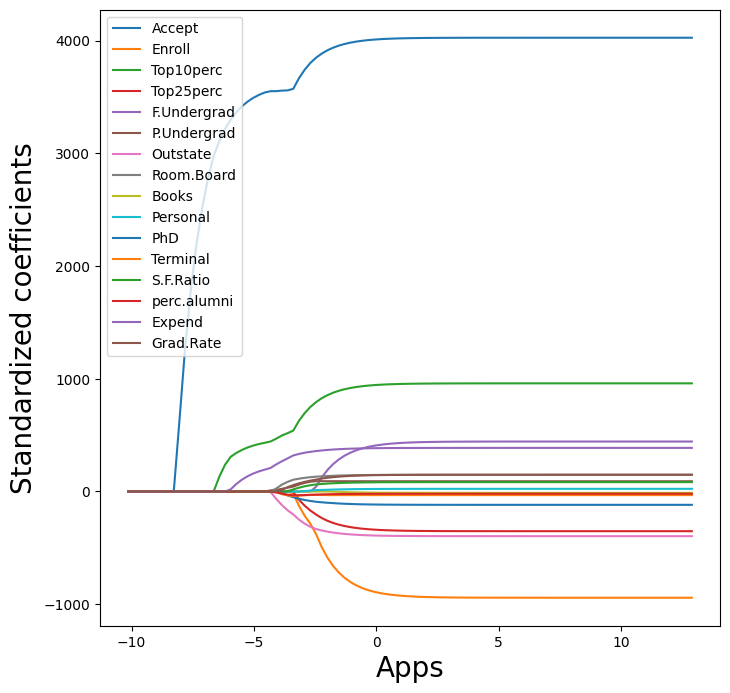

In [51]:
soln_path = pd.DataFrame(soln_array.T,
                         columns=Xs.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'Apps'
soln_path
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('Apps', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');


In [52]:
beta_hat = soln_path.loc[soln_path.index[39]]
lambdas[39], beta_hat

(2.9025749094695104,
 Accept         3980.897228
 Enroll         -802.075304
 Top10perc       917.888999
 Top25perc      -315.704146
 F.Undergrad     343.623151
 P.Undergrad      91.121617
 Outstate       -380.415663
 Room.Board      143.967696
 Books            -6.658052
 Personal         20.310927
 PhD            -110.753912
 Terminal        -32.013779
 S.F.Ratio        78.211518
 perc.alumni     -21.627901
 Expend          379.624005
 Grad.Rate       137.980347
 Name: -1.0655982428596331, dtype: float64)

Implementing ridge regression with elastic net from SKLearn

In [53]:
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.094e+08, tolerance: 1.062e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.02770648400179486, l1_ratio=0))])

We fix the random state of the splitter so that the results obtained will be reproducible.

Test Error:

In [54]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.5,
                              random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+08, tolerance: 3.441e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([1642863.91112127])

This is the Test MSE 1.643e+06.

#### Part (d)

Fit a lasso model on the training set, with $λ$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [55]:
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

3.743608110554328

In [56]:
lambdas, soln_array = skl.Lasso.path(Xs, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=Xs.columns,
                         index=-np.log(lambdas))

We can see from the coefficient plot of the standardized coefficients that depending on the choice of
tuning parameter, some of the coefficients will be exactly equal to
zero.

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_7214/268966441.py:4: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


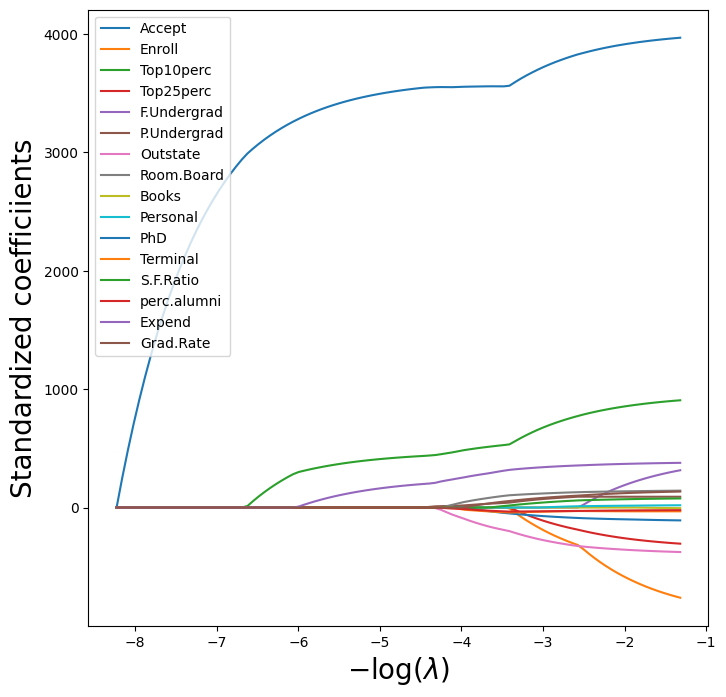

In [57]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

In [58]:
np.min(tuned_lasso.mse_path_.mean(1))

1308989.35930803

In [59]:
tuned_lasso.coef_

array([   0.        , 3964.33086424, -758.8426754 ,  905.00832073,
       -304.75314473,  313.27745631,   91.11443925, -375.49053392,
        142.60705785,   -5.10678236,   19.30618842, -108.4750725 ,
        -32.03017229,   76.66831112,  -22.23150702,  377.29205862,
        134.80889174])

This is rather frightening. Perhaps it would be worth it to scale the data more before applying this regression technique. 18 of the 19 coefficients are nonzero.

Test MSE:

In [60]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.5,
                              random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(tuned_lasso,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']

array([2017037.07537124])

The MSE is 2.017e+06.

#### Part (e)

Fit a PCR (Principal Components Regression) model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [61]:
from sklearn.decomposition import PCA

In [62]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


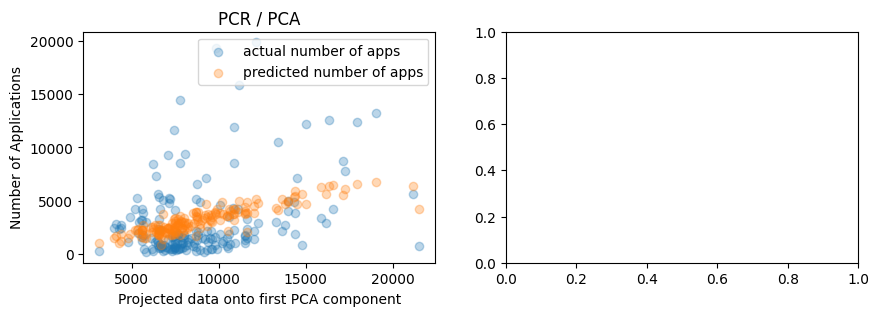

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="actual number of apps")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predicted number of apps"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="Number of Applications", title="PCR / PCA"
)
axes[0].legend()

In [64]:
print(pca.components_)

[[-2.22044605e-16  8.93371472e-02  5.56866794e-02  3.59978954e-01
   3.39702161e-01  3.07141296e-02 -4.32471932e-02  3.55084756e-01
   2.82159635e-01  4.48382210e-02 -1.18746646e-01  3.02431639e-01
   2.97425367e-01 -2.44655736e-01  2.74448578e-01  3.50043339e-01
   2.85789739e-01]]


In [65]:
pca = PCA(n_components=2)
linreg = skl.LinearRegression()

In [66]:
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([ 584.08369377, 1594.1164933 ])

In [67]:
param_grid = {'pca__n_components': range(1, 18)}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 18)},
             scoring='neg_mean_squared_error')

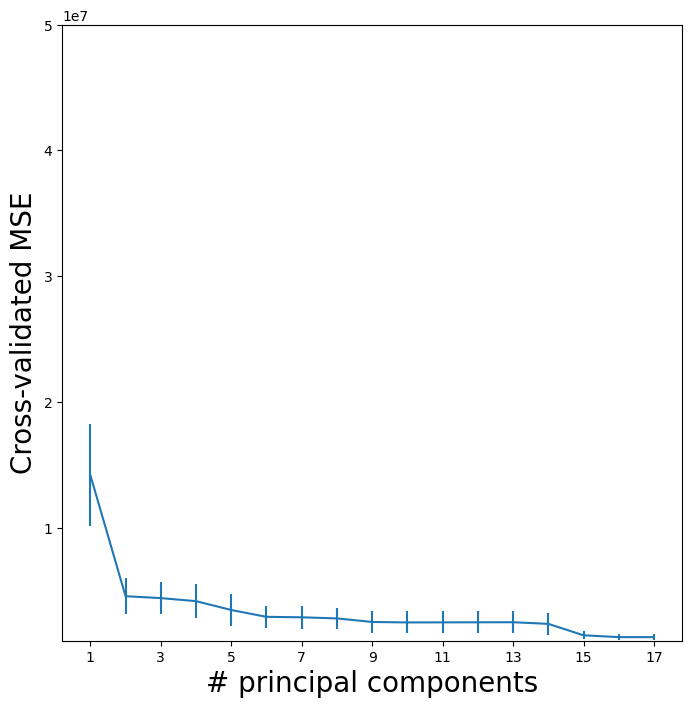

In [68]:
pcr_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([1000000,50000000]);

In [69]:
-grid.cv_results_['mean_test_score'][1]

4542282.969082929

So when we choose to use 2 principal components, we have this mean test errror.

Maybe 2 principal components is the way to go or maybe 6.

In [70]:
pipe.named_steps['pca'].explained_variance_ratio_

array([0.32876419, 0.24272589])

With two components we capture 56% of the variance, but adding additional components only captures 5% more for each component as seen below:

In [71]:
pca = PCA(n_components=7)
linreg = skl.LinearRegression()
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_
pipe.named_steps['pca'].explained_variance_ratio_

array([0.32876419, 0.24272589, 0.07306475, 0.05818396, 0.05703538,
       0.05271256, 0.037862  ])

#### Part (f)

Fit a PLS (Partial Least Squares Regression) model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [72]:
pls = PLSRegression(n_components=2, 
                    scale=True)
pls.fit(X, Y)

PLSRegression()

In [73]:
param_grid = {'n_components':range(1, 18)}
grid = skm.GridSearchCV(pls,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=PLSRegression(),
             param_grid={'n_components': range(1, 18)},
             scoring='neg_mean_squared_error')

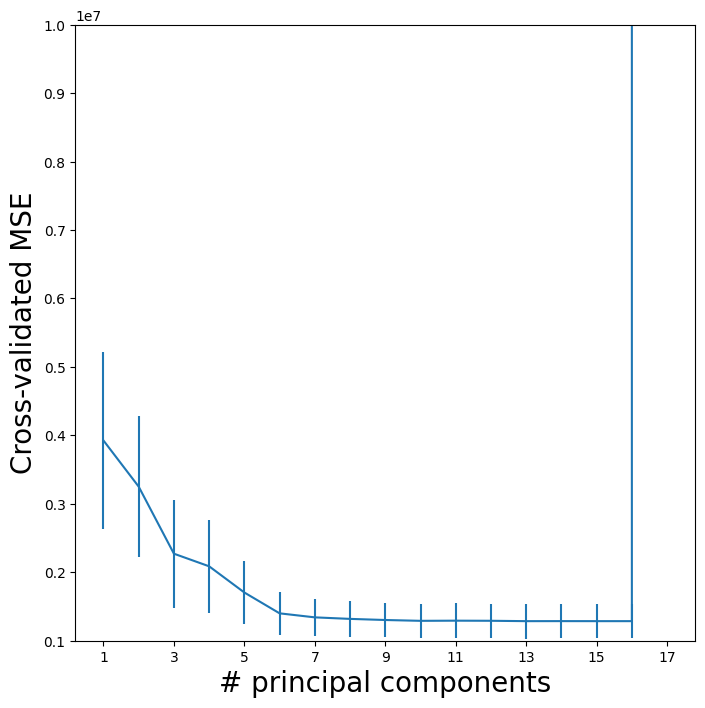

In [74]:
pls_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([1000000,10000000]);

Maybe 6 principal components is worth using for PLS.

In [75]:
-grid.cv_results_['mean_test_score'][5]

1400020.8241027321

In [76]:
grid.cv_results_['std_test_score'][5] / np.sqrt(K)

309638.67693467054

We are unsure why the standard deviation error bar is so different at 17 principal components.

In [77]:
-grid.cv_results_['mean_test_score'][15]

1285972.203935001

In [78]:
grid.cv_results_['std_test_score'][15] / np.sqrt(K)

252922.8709799665

In [79]:
-grid.cv_results_['mean_test_score'][16]

1.3092227132772853e+35

In [80]:
grid.cv_results_['std_test_score'][16] / np.sqrt(K)

5.7565155040601525e+34

#### Part (g)

Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

We cannot predict very accurately the number of college applications received. PLS looks like possibly the best test error. Ridge regression also yields a similarly mediocre test error. But there is not any significant clear-cut winner.

### Problem 10

We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

#### Part (a)

Generate a data set with $p = 20$ features, $n = 1000$ observations, and an associated quantitative response vector generated according to the model $$Y =Xβ+ε,$$ where $β$ has some elements that are exactly equal to zero.

In [81]:
x= pd.DataFrame(np.random.randn(1000, 20))
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.272229,1.096411,1.161570,0.356241,-1.332740,0.692332,0.697781,1.327683,0.653726,-0.390677,-0.953783,0.785547,0.799742,-0.506212,0.499038,1.415542,-0.144500,0.188555,0.335799,0.834148
1,-1.120918,2.640015,0.100628,-0.057841,-0.071756,0.473123,0.494123,1.097256,-0.358460,-0.145426,0.434830,1.309512,1.104169,1.566255,-0.610325,0.508178,-0.790492,0.108424,0.438212,0.110030
2,0.560630,-0.349529,0.216198,0.964316,0.784335,0.304455,-0.870394,-0.055717,0.600010,0.800922,-1.062946,0.552386,-0.200826,-0.043530,-0.442083,0.646600,-1.524531,1.163450,0.016613,-0.641478
3,-1.869889,0.464800,0.168263,1.710016,-0.161354,-1.610736,1.336925,0.571633,-1.701476,-0.024054,-1.079317,-0.641993,-0.200667,0.573184,0.349887,-1.374414,0.639682,0.160161,-0.132438,-1.514684
4,-0.541522,1.694963,2.087386,0.082734,0.084820,-0.395169,-2.002103,1.069984,-1.116543,-0.536908,-0.403280,-1.569052,-0.970898,0.931917,-0.242034,-0.441899,-1.574845,-0.606823,-2.054374,1.332436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.800460,-0.498645,-0.770995,-1.831891,0.814711,-0.725937,-0.087572,0.749896,-2.348716,0.117748,-1.227842,0.520569,1.925635,-0.085380,-1.165311,-0.792827,1.749717,-0.061985,-1.058527,0.701311
996,0.388860,0.353982,0.599741,-0.549091,0.658385,-0.798322,-0.318553,-0.464981,-0.559396,-1.389065,-1.152259,0.161414,0.542268,1.460940,-2.127778,1.167187,1.270648,0.148097,1.030321,0.371481
997,-0.127434,-0.532422,-1.201940,0.538798,-0.523832,1.080518,-2.010156,0.142817,0.188433,0.357201,1.680781,-2.096034,1.249724,-1.274668,-0.499388,-0.718530,0.807498,-0.776146,-0.113023,0.832636
998,-1.129985,-1.034776,0.549380,0.676895,0.198203,-0.625116,-0.471231,0.116975,-0.984762,-0.101774,1.616560,0.572555,0.629558,2.060832,-0.259080,0.425201,0.232097,1.336839,-1.079416,1.045374


In [82]:
column_names=['X'+str(i) for i in range(20)]
x.columns=column_names

In [83]:
x

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,1.272229,1.096411,1.161570,0.356241,-1.332740,0.692332,0.697781,1.327683,0.653726,-0.390677,-0.953783,0.785547,0.799742,-0.506212,0.499038,1.415542,-0.144500,0.188555,0.335799,0.834148
1,-1.120918,2.640015,0.100628,-0.057841,-0.071756,0.473123,0.494123,1.097256,-0.358460,-0.145426,0.434830,1.309512,1.104169,1.566255,-0.610325,0.508178,-0.790492,0.108424,0.438212,0.110030
2,0.560630,-0.349529,0.216198,0.964316,0.784335,0.304455,-0.870394,-0.055717,0.600010,0.800922,-1.062946,0.552386,-0.200826,-0.043530,-0.442083,0.646600,-1.524531,1.163450,0.016613,-0.641478
3,-1.869889,0.464800,0.168263,1.710016,-0.161354,-1.610736,1.336925,0.571633,-1.701476,-0.024054,-1.079317,-0.641993,-0.200667,0.573184,0.349887,-1.374414,0.639682,0.160161,-0.132438,-1.514684
4,-0.541522,1.694963,2.087386,0.082734,0.084820,-0.395169,-2.002103,1.069984,-1.116543,-0.536908,-0.403280,-1.569052,-0.970898,0.931917,-0.242034,-0.441899,-1.574845,-0.606823,-2.054374,1.332436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.800460,-0.498645,-0.770995,-1.831891,0.814711,-0.725937,-0.087572,0.749896,-2.348716,0.117748,-1.227842,0.520569,1.925635,-0.085380,-1.165311,-0.792827,1.749717,-0.061985,-1.058527,0.701311
996,0.388860,0.353982,0.599741,-0.549091,0.658385,-0.798322,-0.318553,-0.464981,-0.559396,-1.389065,-1.152259,0.161414,0.542268,1.460940,-2.127778,1.167187,1.270648,0.148097,1.030321,0.371481
997,-0.127434,-0.532422,-1.201940,0.538798,-0.523832,1.080518,-2.010156,0.142817,0.188433,0.357201,1.680781,-2.096034,1.249724,-1.274668,-0.499388,-0.718530,0.807498,-0.776146,-0.113023,0.832636
998,-1.129985,-1.034776,0.549380,0.676895,0.198203,-0.625116,-0.471231,0.116975,-0.984762,-0.101774,1.616560,0.572555,0.629558,2.060832,-0.259080,0.425201,0.232097,1.336839,-1.079416,1.045374


In [84]:
epsilon=pd.DataFrame(np.random.randn(1000, 1))
beta=pd.DataFrame(np.random.randint(-1, 12,size=(20,1)))
beta

,0
0,0
1,5
2,1
3,11
4,7
5,10
6,4
7,9
8,10
9,8


In [85]:
beta[0][1]=77
for i in range(20):
    if i%3==0:
        beta[0][i]=0
    if i%3==1:
        beta[0][i]=np.random.randint(50,100)
    if i%3==2:
        beta[0][i]=np.random.randint(1,10)
beta


,0
0,0
1,90
2,2
3,0
4,92
5,5
6,0
7,80
8,2
9,0


In [86]:
Y=np.matmul(x,beta)+epsilon

/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_7214/3754306218.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  Y=np.matmul(x,beta)+epsilon


In [87]:
Y

,0
0,38.933675
1,384.881762
2,-214.072079
3,-15.858757
4,197.869595
...,...
995,200.687022
996,200.928577
997,67.370402
998,255.848197


In [88]:
y_df=pd.DataFrame(Y)
y_df.columns=['Y']
y_df

,Y
0,38.933675
1,384.881762
2,-214.072079
3,-15.858757
4,197.869595
...,...
995,200.687022
996,200.928577
997,67.370402
998,255.848197


#### Part (b)

Split your data set into a training set containing 100 observations and a test set containing 900 observations.

In [89]:
df=pd.concat([x,y_df ], axis=1)
df_train,df_test = train_test_split(df,test_size=900,random_state=0)

In [90]:
#X_train, X_test, y_train, y_test= train_test_split(x,y_df,test_size=.9)

#### Part (c)

Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

In [91]:
design = MS(df.columns.drop('Y'))

In [92]:
D = design.fit(df)
D=D.transform(df_test)
D = D.drop('intercept', axis=1)#Drop the intercept as the function fit_path used later fits the \n",
# intercept separately\n",
X_test = np.asarray(D)
Y_test=np.asarray(df_test['Y']) 

In [93]:
D = design.fit(df)
D=D.transform(df_train)
D = D.drop('intercept', axis=1)#Drop the intercept as the function fit_path used later fits the \n",
# intercept separately\n",
X_train = np.asarray(D)
Y_train=np.asarray(df_train['Y']) #Beware to check wether the number of dimensions of Y_train is 1\n",
# cause in the opposite case, the fit_path function used next won't work"

In [94]:
#design = MS(X_train).fit(X_train)
#D = design.transform(X_train)
Y=np.array(y_train)

In [95]:
# D = design.fit_transform(X_train)
#D = D.drop('intercept', axis=1)
#X = np.asarray(D)
X=np.array(X_train)

In [96]:
X.shape

(100, 20)

In [97]:
Y.shape

(507,)

In [98]:
path = fit_path(X_train, 
                Y_train,
                max_nonzeros=X.shape[1])

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  1
Iteration: 3. Number of non-zeros:  2
Iteration: 4. Number of non-zeros:  3
Iteration: 5. Number of non-zeros:  4
Iteration: 6. Number of non-zeros:  7
Iteration: 7. Number of non-zeros:  7
Iteration: 8. Number of non-zeros:  7
Iteration: 9. Number of non-zeros:  7
Iteration: 10. Number of non-zeros:  7
Iteration: 11. Number of non-zeros:  8
Iteration: 12. Number of non-zeros:  8
Iteration: 13. Number of non-zeros:  8
Iteration: 14. Number of non-zeros:  8
Iteration: 15. Number of non-zeros:  8
Iteration: 16. Number of non-zeros:  8
Iteration: 17. Number of non-zeros:  8
Iteration: 18. Number of non-zeros:  8
Iteration: 19. Number of non-zeros:  8
Iteration: 20. Number of non-zeros:  8
Iteration: 21. Number of non-zeros:  8
Iteration: 22. Number of non-zeros:  8
Iteration: 23. Number of non-zeros:  8
Iteration: 24. Number of non-zeros:  8
Iteration: 25. Number of non-zeros:  8
I

In [99]:
path[13]

{'B': array([ 0.        , 87.22371076,  0.        ,  0.        , 89.62844445,
         0.        ,  0.        , 77.65299777,  0.        ,  0.        ,
        66.60997692,  8.02375277,  0.        , 58.7692299 ,  0.        ,
         0.        , 91.88867346,  0.        ,  0.        , 61.30864925]),
 'B0': -0.3718253144853563,
 'lambda_0': 0.00016716767759496667,
 'M': 0.5637871787020912,
 'Time_exceeded': False}

In [100]:
iteration=[1,2,3,4,8,13,15]
pred_num=[1,2,5,6,7,8,9]
coef_list=[]
for i in iteration:
    #construct a list of arrays. Each array contains the subsets coefficients
    coef_list.append(path[i]['B'])
    Yhat=[]
for i in range(len(iteration)):
    Yhat.append(np.matmul(X_train,coef_list[i]))
    MSE=[]
for i in range(len(Yhat)):
    MSE.append(np.sqrt(np.mean((Yhat[i]-Y_train)**2)))

In [101]:
MSE

[183.78664868723382,
 149.36868854904168,
 124.54865556637596,
 100.37943842142305,
 10.54348902987717,
 7.178109760548871,
 7.178109760548871]

Text(8, 7.178109760548871, 'Minimum MSE')

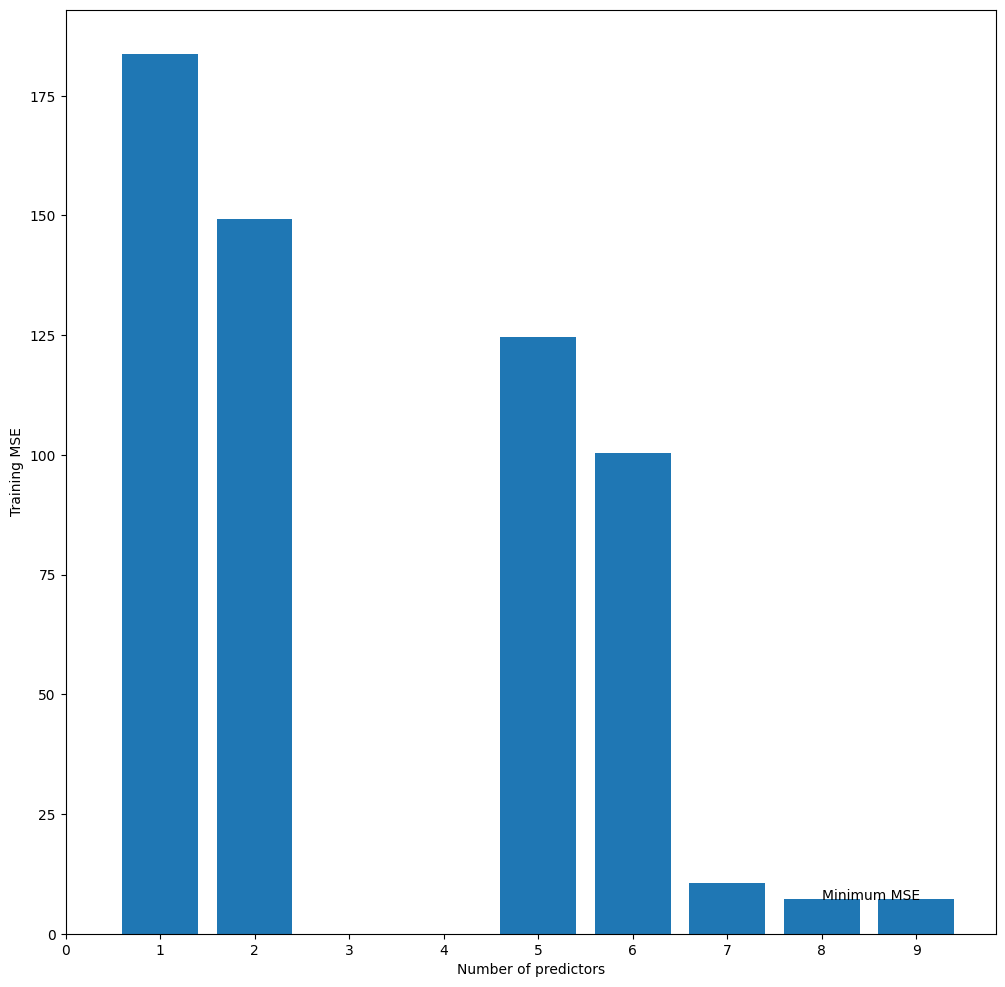

In [102]:
mse_fig, ax = subplots(figsize=(12,12))
ax.bar(pred_num,MSE)
ax.set_ylabel('Training MSE')
ax.set_xlabel('Number of predictors')
ax.set_xticks(np.arange(max(pred_num)+1))
ax.annotate('Minimum MSE',(pred_num[np.argmin(MSE)],min(MSE)))

#### Part (d)

Plot the test set MSE associated with the best model of each size.

In [103]:
iteration=[1,2,3,4,8,13,15]
pred_num=[1,2,5,6,7,8,9]
coef_list=[]
for i in iteration:
    #construct a list of arrays. Each array contains the subsets coefficients
    coef_list.append(path[i]['B'])
    Yhat=[]
for i in range(len(iteration)):
    Yhat.append(np.matmul(X_test,coef_list[i]))
    MSE=[]
for i in range(len(Yhat)):
    MSE.append(np.sqrt(np.mean((Yhat[i]-Y_test)**2)))

In [104]:
MSE

[185.95084818838984,
 164.49203011611635,
 151.41060176905316,
 119.46876915123089,
 10.28154617073022,
 8.18949555425813,
 8.18949555425813]

Text(8, 8.18949555425813, 'Minimum MSE')

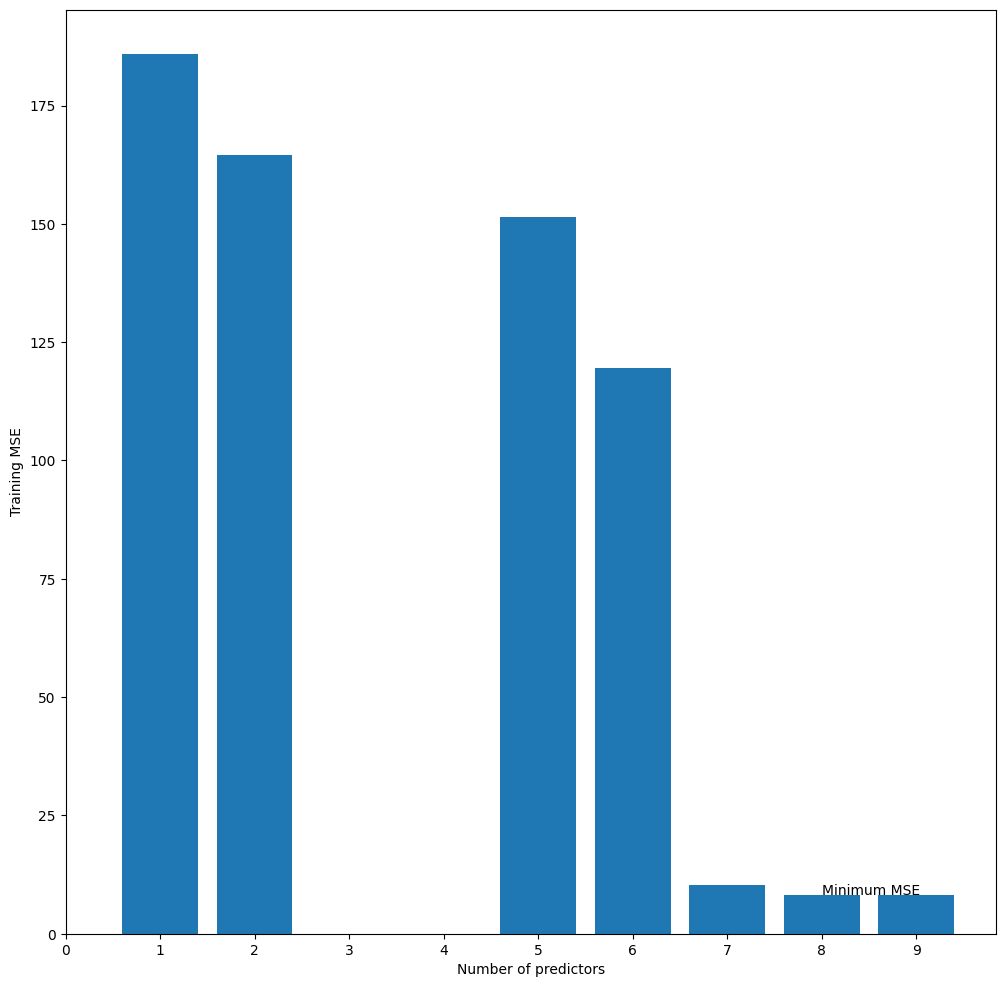

In [105]:
mse_fig, ax = subplots(figsize=(12,12))
ax.bar(pred_num,MSE)
ax.set_ylabel('Training MSE')
ax.set_xlabel('Number of predictors')
ax.set_xticks(np.arange(max(pred_num)+1))
ax.annotate('Minimum MSE',(pred_num[np.argmin(MSE)],min(MSE)))

#### Part (e)

For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

With 8 predictors.

#### Part (f)

How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.

In [106]:
beta

,0
0,0
1,90
2,2
3,0
4,92
5,5
6,0
7,80
8,2
9,0


In [107]:
coefs = pd.DataFrame(np.nan, index=range(20), columns=['beta', 'path_coef'])
coefs['beta']=beta
coefs['path_coef']=pd.Series(path[13]['B'])

In [108]:
coefs

,beta,path_coef
0,0,0.000000
1,90,87.223711
2,2,0.000000
3,0,0.000000
4,92,89.628444
5,5,0.000000
6,0,0.000000
7,80,77.652998
8,2,0.000000
9,0,0.000000


In [109]:
path[13]['B'][1]

87.22371076285671

Very close to the true model we used to generate the data. The coefficients chosen corresponded to the coefficients we found using the minimized MSE model. Some are almost exactly the same (the larger coefficients chosen and the zeros). Most of the smaller coefficients chosen were zeroed in the minimized MSE model.

#### Part (g)

Create a plot displaying $\sqrt{\sum_{j=1}^p(β_j − \hat{\beta}_j^r)^2}$ for a range of values of $r$, where $\hat{β}_j^r$ is the $j$th coefficient estimate for the best model containing $r$ coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?

In [110]:
for i in range(7):
    sum=0
    for j in range(20):
        sum+=(beta[0][j]-path[iteration[i]]['B'][j])**2
    print(pred_num[i],np.sqrt(sum))



1 188.4328586500844
2 164.06227379231498
5 151.97190847227122
6 122.20881000972862
7 10.313139027256362
8 7.901342929457075
9 7.901342929457075


Very similar, except this value continues to decrease with the number of predictors.

### Problem 11

We will now try to predict per capita crime rate in the Boston data set.

In [111]:
from ISLP import load_data

In [112]:
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


#### Part (a)

Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

## BEST SUBSET

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
Boston_train,Boston_test = train_test_split(Boston,test_size=0.2,random_state=0)

In [115]:
design = MS(Boston_train.columns.drop('crim')).fit(Boston_train)
Y = np.array(Boston_train['crim'])
X = design.transform(Boston_train)

In [116]:
D = design.fit_transform(Boston_train)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

In [117]:
path = fit_path(X, 
                Y,
                max_nonzeros=X.shape[1])

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  2
Iteration: 3. Number of non-zeros:  9
Iteration: 4. Number of non-zeros:  11
Iteration: 5. Number of non-zeros:  12


In [118]:
path[2]

{'B': array([ 0.03794944, -0.1110938 , -0.90393691,  0.        ,  1.00054306,
         0.        , -0.62129952,  0.47009479,  0.        , -0.14055237,
         0.17839032, -0.17681512]),
 'B0': 0.18022413321523523,
 'lambda_0': 0.0011954027864353267,
 'M': 0.6154618768467767,
 'Time_exceeded': False}

In [119]:
iteration=[0,1,2,3,4]
pred_num=[1,2,9,11,12]
coef_list=[]
for i in iteration:
    #construct a list of arrays. Each array contains the subsets coefficients
    coef_list.append(path[i]['B'])
    Yhat=[]
for i in range(len(iteration)):
    Yhat.append(np.matmul(X,coef_list[i]))
    MSE=[]
for i in range(len(Yhat)):
    MSE.append(np.sqrt(np.mean((Yhat[i]-Y)**2)))

In [120]:
MSE

[6.658695299077027,
 7.437484370566045,
 6.025945113663528,
 8.346438771293203,
 8.383864536022738]

In [121]:
design = MS(Boston_test.columns.drop('crim')).fit(Boston_test)
Y_test = np.array(Boston_test['crim'])
X_test = design.transform(Boston_test)

In [122]:
D = design.fit_transform(Boston_test)
D = D.drop('intercept', axis=1)
X_test = np.asarray(D)

In [123]:
iteration=[0,1,2,3,4]
pred_num=[1,2,9,11,12]
coef_list=[]
for i in iteration:
    #construct a list of arrays. Each array contains the subsets coefficients
    coef_list.append(path[i]['B'])
    Yhat=[]
for i in range(len(iteration)):
    Yhat.append(np.matmul(X_test,coef_list[i]))
    MSE=[]
for i in range(len(Yhat)):
    MSE.append(np.sqrt(np.mean((Yhat[i]-Y_test)**2)))

In [124]:
MSE

[8.109707635995159,
 8.558989147042864,
 7.857158882095182,
 10.289729910124068,
 10.32844473469479]

## Ridge Regression

In [147]:
design = MS(Boston_train.columns.drop('crim')).fit(Boston_train)
Y = np.array(Boston_train['crim'])
X = design.transform(Boston_train)

In [149]:
X=X.drop('intercept', axis=1)
Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
lambdas = 10**np.linspace(8, -2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs,
                                 Y,
                                 l1_ratio=0.,
                                 alphas=lambdas)[1]
soln_array.shape

/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_7214/1946195840.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = X - X.mean(0)[None,:]
/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_7214/1946195840.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = Xs / X_scale[None,:]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/

(12, 100)

In [126]:
pd.set_option('display.max_rows', 100)

In [128]:
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'

soln_path.iloc[79]

zn         0.588647
indus     -0.478371
chas      -0.203287
nox       -0.130845
rm         0.564553
age       -0.189632
dis       -1.075404
rad        3.041884
tax        0.871844
ptratio   -0.182318
lstat      1.345504
medv      -1.222029
Name: 2.0487813883134316, dtype: float64

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_7214/1565222265.py:3: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


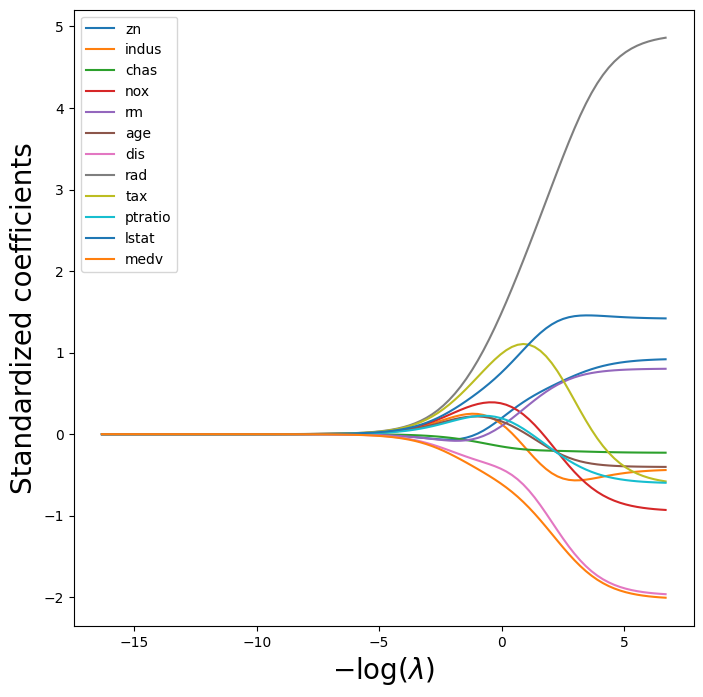

In [129]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

In [130]:
beta_hat = soln_path.loc[soln_path.index[59]]
lambdas[59], beta_hat

(13.502916082643962,
 zn        -0.061867
 indus      0.152167
 chas      -0.029801
 nox        0.178445
 rm        -0.066755
 age        0.130316
 dis       -0.150324
 rad        0.294232
 tax        0.259889
 ptratio    0.113627
 lstat      0.199501
 medv      -0.174670
 Name: -2.6029056682401954, dtype: float64)

In [131]:
np.linalg.norm(beta_hat)

0.5840249101814521

In [132]:
beta_hat = soln_path.loc[soln_path.index[82]]
lambdas[82], np.linalg.norm(beta_hat)

(0.0641497909434463, 4.566508780805938)

In [133]:
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.204e+04, tolerance: 2.669e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=13.502916082643962, l1_ratio=0))])

In [134]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.5,
                              random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.402e+03, tolerance: 1.459e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([29.17534269])

In [135]:
ridge.alpha = 1e10
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.297e+03, tolerance: 1.459e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([59.90019641])

In [136]:
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=validation,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.297e+03, tolerance: 1.459e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.297e+03, tolerance: 1.459e+00 Linear regression models with null weight for the l1 regularization term are mor

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.001230335423345803, l1_ratio=0))])

In [137]:
grid = skm.GridSearchCV(pipe, 
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.123e+04, tolerance: 2.246e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e+04, tolerance: 2.013e+00 Linear regression models with null weight for the l1 regularization term are mor

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.025301999415079924, l1_ratio=0))])

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_7214/1733721756.py:6: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


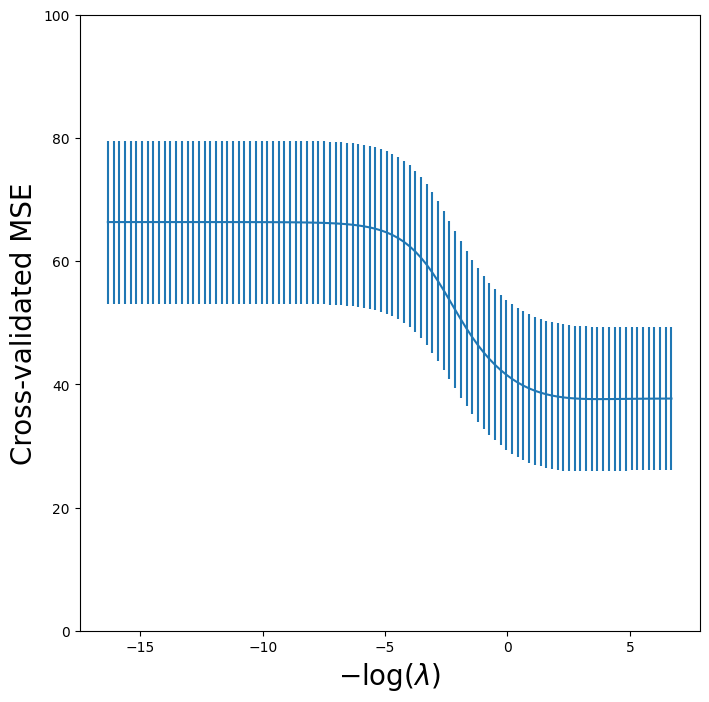

In [138]:
ridge_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            -grid.cv_results_['mean_test_score'],
            yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylim([0,100])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [139]:
ridge.alpha = 0.135
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.461e+03, tolerance: 1.459e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([28.79446498])

In [140]:
ridge.alpha = 2
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.620e+03, tolerance: 1.459e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([29.15449587])

With a MSE of about 28, ridge regression seems worse than best subset.

## Lasso Regression

In [150]:
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

0.02714588254188251

In [151]:
lambdas, soln_array = skl.Lasso.path(Xs, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=Xs.columns,
                         index=-np.log(lambdas))

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_7214/268966441.py:4: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


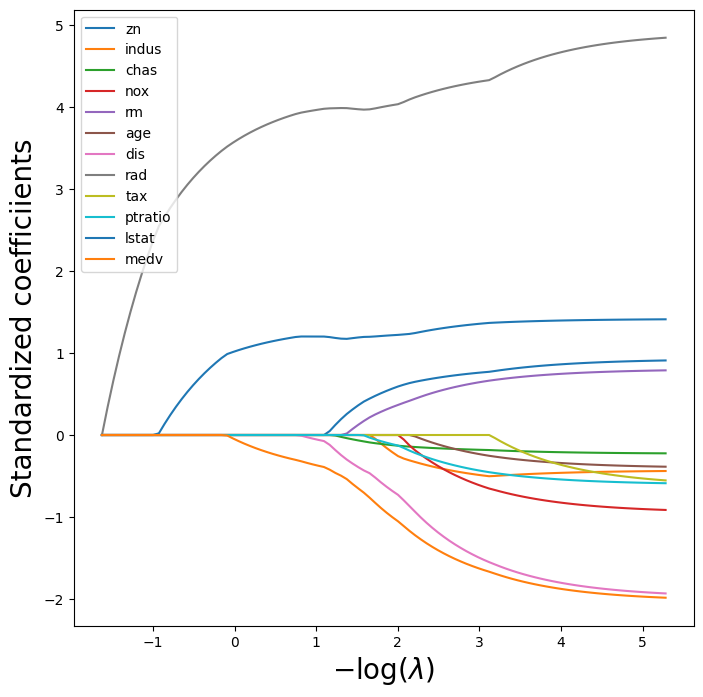

In [152]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

Cross validation error plot:

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_7214/2097060480.py:7: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


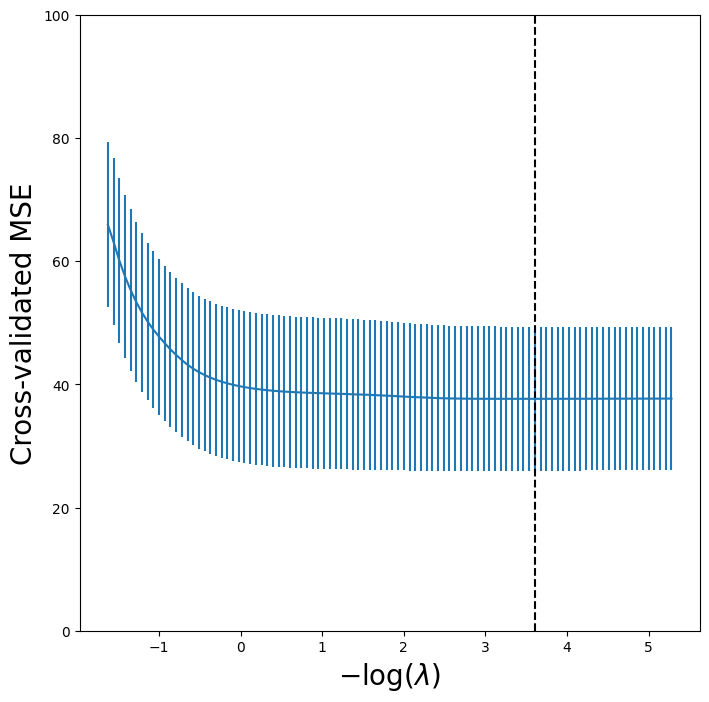

In [156]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([0,100])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [153]:
np.min(tuned_lasso.mse_path_.mean(1))

37.648199800328825

In [154]:
tuned_lasso.coef_

array([ 0.83107329, -0.47663945, -0.2006562 , -0.76711981,  0.71611774,
       -0.31034316, -1.71651995,  4.5485875 , -0.23937112, -0.51151167,
        1.38497127, -1.80331331])

In [155]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.5,
                              random_state=0)
results = skm.cross_validate(tuned_lasso,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']

array([29.68820587])

## PCR

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


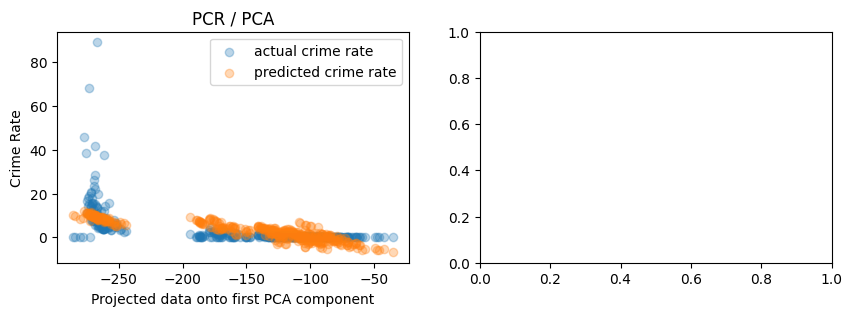

In [173]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X, Y)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X), Y, alpha=0.3, label="actual crime rate")
axes[0].scatter(
    pca.transform(X), pcr.predict(X), alpha=0.3, label="predicted crime rate"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="Crime Rate", title="PCR / PCA"
)
axes[0].legend()

In [174]:
print(pca.components_)

[[ 0.27301344 -0.34751685  0.01509572 -0.34370373  0.22414549 -0.31618219
   0.31212797 -0.29878345 -0.32899439 -0.21934563 -0.32562466  0.29503649]]


In [175]:
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([-1.77151398])

In [176]:
param_grid = {'pca__n_components': range(1, 12)}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=1)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 12)},
             scoring='neg_mean_squared_error')

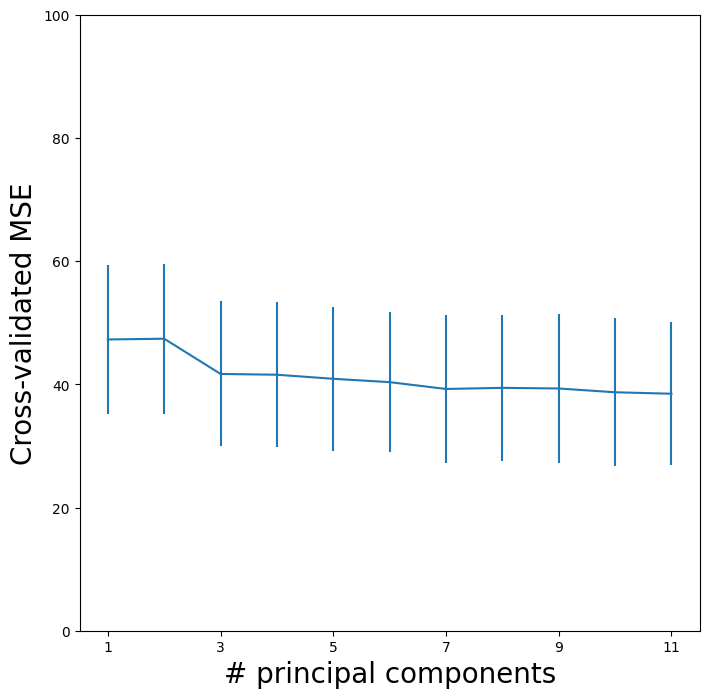

In [177]:
pcr_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([0,100]);

In [172]:
-grid.cv_results_['mean_test_score'][2]

41.68502263952773

#### Part (b)

Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, cross- validation, or some other reasonable alternative, as opposed to using training error.

Our best model was from Best Subset Selection.

#### Part (c)

Does your chosen model involve all of the features in the data set? Why or why not?

No. Because some of the coefficients are zero when using best subset selection.